Total samples: 25000
Train data shape: (23750, 2)
Test data shape: (1250, 2)
Optimal parameters (theta): [-82.34665072   3.07990113]
Train RMSE: 10.071992858151404


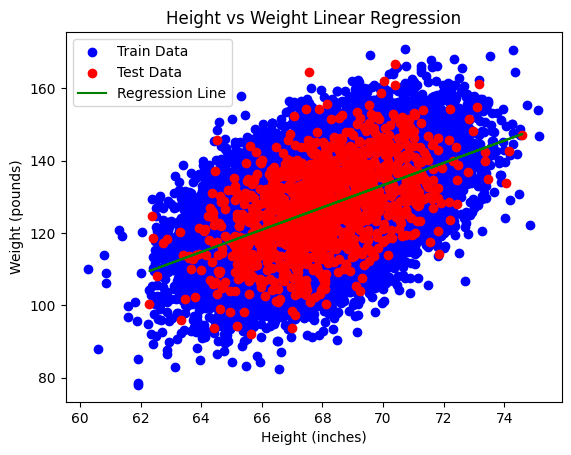

In [51]:
import numpy as np

#load the data
file_path = "/home/saeid/python/Project_based_learning/height_and_weight_data.csv"
data = np.genfromtxt(file_path, delimiter=",", skip_header=1)
data = data[:, 1:]  # Skip the first column (index column)
total_samples = data.shape[0]
print("Total samples:", total_samples)

# Split the data into training and testing sets
train_size = int(0.95 * total_samples)
shuffled_indices = np.random.permutation(total_samples)

train_data = data[shuffled_indices[:train_size]]
test_data = data[shuffled_indices[train_size:]]
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Separate features and labels
X_train = train_data[:, 0].reshape(-1, 1)  # Height
y_train = train_data[:, 1]  # Weight

X_test = test_data[:, 0].reshape(-1, 1)  # Height
y_test = test_data[:, 1]  # Weight

# apply linear regression using Ordinary Least square method

# Linear regression using Ordinary Least Squares
# The Normal Equation: theta_best = inv(X.T @ X) @ X.T @ y

def lr_ols(X, y):
    # Add a bias term (intercept) to the input data
    # to be in the form of  y = theta_0 + theta_1 * x
    X_b = np.hstack([np.ones((X.shape[0],1)),X])
    # Calculate the optimal parameters using the Normal Equation
    theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return theta_best

#predict
def ols_predict(theta_best,X):
    X_b = np.hstack([np.ones((X.shape[0],1)),X])
    predictions = X_b @ theta_best
    return (predictions)

# Train the model
theta_best = lr_ols(X_train, y_train)
print("Optimal parameters (theta):", theta_best)

# Make predictions on the test set
y_pred = ols_predict(theta_best, X_test)
# print("Predictions on test set:", y_pred)

# Calculate the Root Mean Squared Error (MSE)
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calculate RMSE for the test set
test_rmse = rmse(y_test, y_pred)
#print("Test RMSE:", test_rmse)

# Calculate RMSE for the training set
y_train_pred = ols_predict(theta_best, X_train)
train_rmse = rmse(y_train, y_train_pred)
print("Train RMSE:", train_rmse)


#plotting regression line
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_test, y_pred, color='green', label='Regression Line')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs Weight Linear Regression')
plt.legend()
plt.show()



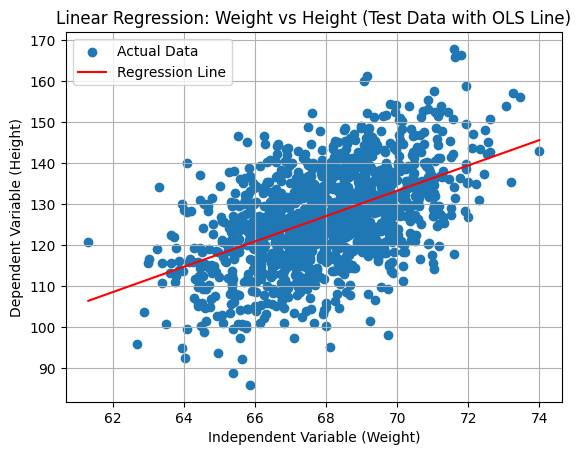

In [ ]:
plt.figure()
plt.scatter(X_test, y_test, label='Actual Data') # Plot the actual test data points
# Plot the regression line
# Create a range of X values for the line
X_line = np.array([X_test.min(), X_test.max()]).reshape(-1, 1)
# Predict the corresponding y values using the learned theta
y_line = ols_predict(theta_best, X_line)
plt.plot(X_line, y_line, color='red', label='Regression Line') # Plot the line

# plt.xlabel("Independent Variable (Weight)")
# plt.ylabel("Dependent Variable (Height)")
# plt.title("Linear Regression: Weight vs Height (Test Data with OLS Line)")
# plt.legend()
# plt.grid(True)
# plt.show()

In [52]:
print("\nInterpretation of Coefficients:")
print(f"  Intercept (theta_0): {theta_best[0]:.4f}")
print(f"  Coefficient for Weight (theta_1): {theta_best[1]:.4f}")
print(f"  This means for every one-unit increase in Weight, we predict Height increases by {theta_best[1]:.4f}.")
print(f"  When Weight is 0, the predicted Height is {theta_best[0]:.4f}. (Note: Interpret the intercept cautiously if 0 is outside the range of your data)")



Interpretation of Coefficients:
  Intercept (theta_0): -82.3467
  Coefficient for Weight (theta_1): 3.0799
  This means for every one-unit increase in Weight, we predict Height increases by 3.0799.
  When Weight is 0, the predicted Height is -82.3467. (Note: Interpret the intercept cautiously if 0 is outside the range of your data)
